# Задача 7
## Анализ совместного распределения дискретных случайных величин X и Y

**Задачи:**

1. Найти пропущенную вероятность
2. Маргинальные распределения X и Y
3. Распределение \(U = g(X,Y)\) для заданной функции
4. Математическое ожидание, дисперсию, σ, моду, медиану, коэффициенты асимметрии и эксцесса
5. Ковариацию и коэффициент корреляции
6. Проверку независимости

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Функция g(X,Y)

Функция задана как:

$$
g(X,Y) = (-1)^{|X|+|Y|} - (-1)^{|X \cdot Y|}
$$

In [4]:
def g(X, Y):
    return (-1) ** (abs(X) + abs(Y)) - (-1) ** (abs(X * Y))

In [8]:
with open('data/10.txt', 'r') as f:
    lines = f.readlines()

X_values = np.array([int(x) for x in lines[0].split(",")])
Y_values = np.array([int(y) for y in lines[1].split(",")])

prob_list = []
for line in lines[2:]:
    prob_row = []
    for x in line.split(","):
        if x.upper() == 'NULL':
            prob_row.append(np.nan)
        else:
            prob_row.append(float(x))
    prob_list.append(prob_row)

prob_table = np.array(prob_list)
prob_table


array([[0.02, 0.07, 0.08,  nan, 0.03],
       [0.11, 0.03, 0.02, 0.03, 0.06],
       [0.01, 0.02, 0.04, 0.04, 0.08],
       [0.02, 0.11, 0.06, 0.04, 0.1 ]])

## 3. Пропущенное значение вероятности

Сумма всех вероятностей должна быть равна 1:

$$
\sum_{i,j} P(X=x_i, Y=y_j) = 1
$$

Пропущенное значение $$p_{missing} = 1 - \sum_{i,j,known} P(X=x_i, Y=y_j)$$

In [9]:
missing_sum = 1 - np.nansum(prob_table)
prob_table[np.isnan(prob_table)] = missing_sum
print("Пропущенная вероятность:", missing_sum)

Пропущенная вероятность: 0.030000000000000138


In [10]:
prob_table

array([[0.02, 0.07, 0.08, 0.03, 0.03],
       [0.11, 0.03, 0.02, 0.03, 0.06],
       [0.01, 0.02, 0.04, 0.04, 0.08],
       [0.02, 0.11, 0.06, 0.04, 0.1 ]])

## 4. Маргинальные распределения

Маргинальные распределения вычисляются как:

$$
P_X(x_i) = \sum_j P(X=x_i, Y=y_j), \quad
P_Y(y_j) = \sum_i P(X=x_i, Y=y_j)
$$

In [12]:
P_X = prob_table.sum(axis=1)
P_Y = prob_table.sum(axis=0)

P_X

array([0.23, 0.25, 0.19, 0.33])

In [15]:
joint_df = pd.DataFrame(prob_table, index=X_values, columns=Y_values)
joint_df.index.name = 'X'
joint_df.columns.name = 'Y'

P_X_df = pd.DataFrame({'P_X': P_X}, index=X_values)
P_Y_df = pd.DataFrame({'P_Y': P_Y}, index=Y_values)

print("Маргинальное распределение X:")
display(P_X_df)

print("Маргинальное распределение Y:")
display(P_Y_df)

Маргинальное распределение X:


,P_X
-5,0.23
-4,0.25
13,0.19
17,0.33


Маргинальное распределение Y:


,P_Y
-6,0.16
-3,0.23
0,0.20
8,0.14
9,0.27


## 5. Распределение случайной величины $U = g(X,Y)$

Вероятность каждого значения U вычисляется суммированием вероятностей совместного распределения, где $g(X,Y)$ принимает одно и то же значение.

,U,P(U)
0,-2,0.43
1,0,0.16
2,2,0.41


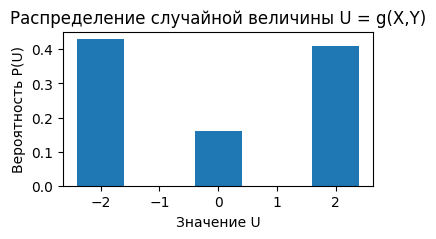

In [21]:
U_dict = {}
for i, x in enumerate(X_values):
    for j, y in enumerate(Y_values):
        u_val = g(x, y)
        U_dict[u_val] = U_dict.get(u_val, 0) + prob_table[i,j]

U_df = pd.DataFrame(list(U_dict.items()), columns=['U', 'P(U)']).sort_values('U').reset_index(drop=True)
display(U_df)

plt.figure(figsize=(4,2))
plt.bar(U_df['U'], U_df['P(U)'])
plt.xlabel('Значение U')
plt.ylabel('Вероятность P(U)')
plt.title('Распределение случайной величины U = g(X,Y)')
plt.show()

## 6. Характеристики X и Y

Общие формулы:

- Математическое ожидание:
$$
\mathbb{E}[X] = \sum_i x_i P_X(x_i)
$$

- Дисперсия:
$$
\mathrm{Var}(X) = \sum_i (x_i - \mathbb{E}[X])^2 P_X(x_i)
$$

- Среднее квадратическое отклонение:
$$
\sigma_X = \sqrt{\mathrm{Var}(X)}
$$

- Асимметрия:
$$
\gamma_1 = \frac{\sum_i (x_i - \mathbb{E}[X])^3 P_X(x_i)}{\sigma_X^3}
$$

- Эксцесс:
$$
\gamma_2 = \frac{\sum_i (x_i - \mathbb{E}[X])^4 P_X(x_i)}{\sigma_X^4} - 3
$$

- Мода: значение с наибольшей вероятностью
- Медиана: 50-й процентиль распределения


In [24]:
def stats(values, probs):
    values = np.array(values)
    probs = np.array(probs)
    mean = np.sum(values * probs)
    var = np.sum((values - mean) ** 2 * probs)
    std = np.sqrt(var)

    mode = values[np.argmax(probs)]

    sorted_indices = np.argsort(values)
    sorted_values = values[sorted_indices]
    sorted_probs = probs[sorted_indices]
    cum_probs = np.cumsum(sorted_probs)
    median = sorted_values[np.searchsorted(cum_probs, 0.5)]

    skewness = np.sum((values - mean) ** 3 * probs) / std ** 3
    kurtosis = np.sum((values - mean) ** 4 * probs) / std ** 4 - 3

    return {
        "Мат ожидание": mean,
        "Дисперсия": var,
        "Среднее квадратическое отклонение": std,
        "Мода": mode,
        "Медиана": median,
        "Асимметрия": skewness,
        "Эксцесс": kurtosis,
    }

stats_X = stats(X_values, P_X)
stats_Y = stats(Y_values, P_Y)

print("Характеристики X:", stats_X)
print("Характеристики Y:", stats_Y)


Характеристики X: {'Мат ожидание': np.float64(5.93), 'Дисперсия': np.float64(102.06510000000003), 'Среднее квадратическое отклонение': np.float64(10.102727354531549), 'Мода': np.int64(17), 'Медиана': np.int64(13), 'Асимметрия': np.float64(-0.029381177257836115), 'Эксцесс': np.float64(-1.9302714888571235)}
Характеристики Y: {'Мат ожидание': np.float64(1.9000000000000015), 'Дисперсия': np.float64(35.050000000000004), 'Среднее квадратическое отклонение': np.float64(5.920304046246274), 'Мода': np.int64(9), 'Медиана': np.int64(0), 'Асимметрия': np.float64(0.10166420838346758), 'Эксцесс': np.float64(-1.6663801660965285)}


## 7. Ковариация и коэффициент корреляции

Общие формулы:

$$
\mathrm{Cov}(X,Y) = \sum_{i,j} (x_i - \mathbb{E}[X])(y_j - \mathbb{E}[Y]) P(X=x_i,Y=y_j)
$$

$$
\rho_{XY} = \frac{\mathrm{Cov}(X,Y)}{\sigma_X \sigma_Y}
$$


In [29]:
mean_X, mean_Y = stats_X["Мат ожидание"], stats_Y["Мат ожидание"]
cov = np.sum((X_values[:, None] - mean_X) * (Y_values[None, :] - mean_Y) * prob_table)
corr = cov / (stats_X["Среднее квадратическое отклонение"] * stats_Y["Среднее квадратическое отклонение"])

print("Ковариация X,Y:", cov)
print("Коэффициент корреляции X,Y:", corr)

Ковариация X,Y: 12.762999999999993
Коэффициент корреляции X,Y: 0.21338806505918903


Можем сразу скать, что величины зависимы, так как коэффециэнт корреляции не равен 0. Но проведем проверку по

## 8. Проверка независимости

Случайные величины X и Y независимы, если для всех $i,j$:

$$
P(X=x_i,Y=y_j) = P_X(x_i) \cdot P_Y(y_j)
$$


In [30]:
independent = np.allclose(prob_table, P_X[:, None] * P_Y[None, :])
print("X и Y независимы?", independent)

X и Y независимы? False
